In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [2]:
data = pd.read_csv('spam.csv', usecols = [0,1],encoding = 'latin')

In [4]:
data.rename({'v1': 'label', 'v2': 'message'}, axis = 1,inplace = True)

In [5]:
data.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
data.isna().sum()

label      0
message    0
dtype: int64

In [7]:
corpus = data['message'].values

In [11]:
corpus

array(['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
       'Ok lar... Joking wif u oni...',
       "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
       ..., 'Pity, * was in mood for that. So...any other suggestions?',
       "The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free",
       'Rofl. Its true to its name'], dtype=object)

In [12]:
def process_string(corpus):
    i = 0
    while (i < len(corpus)):
        msg = corpus[i]
        corpus[i] = msg.lower()
        i += 1 
    return " ".join(corpus)

In [13]:
string = process_string(corpus)

In [14]:
words = pd.Series(string.split())

In [15]:
words

0             go
1          until
2         jurong
3         point,
4        crazy..
          ...   
86330        its
86331       true
86332         to
86333        its
86334       name
Length: 86335, dtype: object

In [16]:
words.value_counts()

to               2226
i                2208
you              1917
a                1419
the              1317
                 ... 
0871212025016       1
stream              1
cos...              1
polyc               1
rofl.               1
Name: count, Length: 13496, dtype: int64

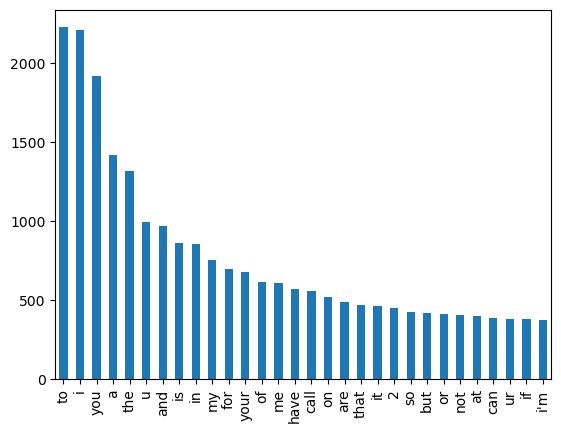

In [17]:
words.value_counts()[:30].plot(kind = "bar")
plt.show()

In [18]:
from nltk.corpus import stopwords

In [19]:
stopwords = stopwords.words('english')

In [20]:
stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [21]:
def process_string(corpus,stopwords = []):
    i = 0
    while (i < len(corpus)):
        msg = corpus[i].lower()
        sentance = []
        for word in msg.split():
            if word not in stopwords:
                sentance.append(word)
        msg = " ".join(sentance)
        corpus[i] = msg
        i += 1 
    return " ".join(corpus)

In [22]:
info = process_string(corpus)

In [23]:
info

'go until jurong point, crazy.. available only in bugis n great world la e buffet... cine there got amore wat... ok lar... joking wif u oni... free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005. text fa to 87121 to receive entry question(std txt rate)t&c\'s apply 08452810075over18\'s u dun say so early hor... u c already then say... nah i don\'t think he goes to usf, he lives around here though freemsg hey there darling it\'s been 3 week\'s now and no word back! i\'d like some fun you up for it still? tb ok! xxx std chgs to send, å£1.50 to rcv even my brother is not like to speak with me. they treat me like aids patent. as per your request \'melle melle (oru minnaminunginte nurungu vettam)\' has been set as your callertune for all callers. press *9 to copy your friends callertune winner!! as a valued network customer you have been selected to receivea å£900 prize reward! to claim call 09061701461. claim code kl341. valid 12 hours only. had your mobile 11 months or more?

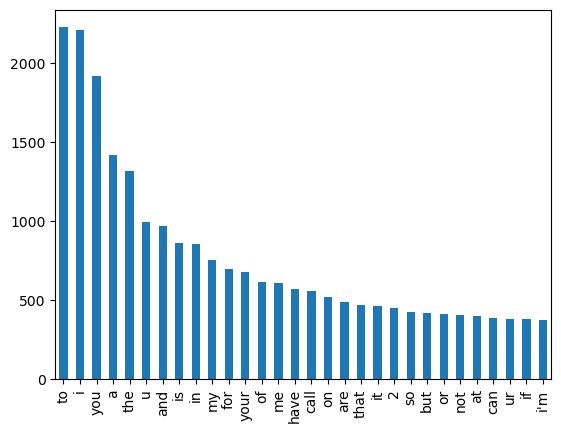

In [24]:
pd.Series(info.split()).value_counts()[:30].plot(kind = "bar")
plt.show()

In [25]:
import string


In [26]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [27]:
stopwords += ['u','2','ur',"i'm",'4','...','ok',"i'll"] + list(string.punctuation)

In [28]:
stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

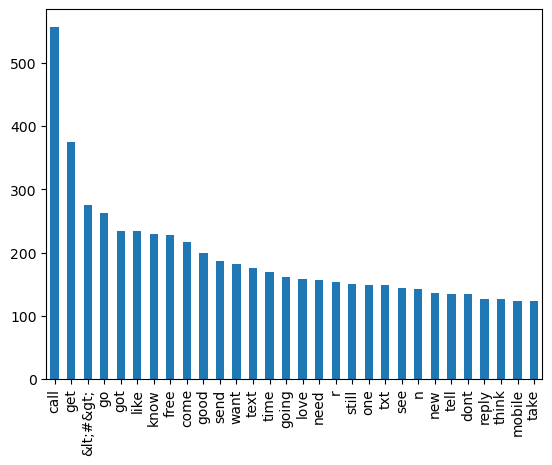

In [29]:
info = process_string(corpus,stopwords)
pd.Series(info.split()).value_counts()[:30].plot(kind = "bar")
plt.show()

In [30]:
import re

In [31]:
def process_string(msg):
    msg = msg.lower()
    sentance = []
    for word in msg.split():
        if word not in stopwords:
            sentance.append(word)
        msg = " ".join(sentance)
        msg = re.sub(r"[!\"#$%&\'()*+,-.:;<=>?@[\\\]^_`{|}~]","",msg)
    return msg

In [32]:
data['message'] = data['message'].apply(process_string)

In [33]:
data.head()

,label,message
0,ham,go jurong point crazy available bugis n great ...
1,ham,lar joking wif oni
2,spam,free entry wkly comp win fa cup final tkts 21s...
3,ham,dun say early hor c already say
4,ham,nah think goes usf lives around though


In [34]:
ham = data[data['label'] == 'ham']
spam = data[data['label'] == 'spam']

In [35]:
ham.head()

,label,message
0,ham,go jurong point crazy available bugis n great ...
1,ham,lar joking wif oni
3,ham,dun say early hor c already say
4,ham,nah think goes usf lives around though
6,ham,even brother like speak me treat like aids patent


In [36]:
spam.head()

,label,message
2,spam,free entry wkly comp win fa cup final tkts 21s...
5,spam,freemsg hey darling 3 weeks word back id like ...
8,spam,winner valued network customer selected receiv...
9,spam,mobile 11 months more r entitled update latest...
11,spam,six chances win cash 100 20000 pounds txt csh1...


In [37]:
ham_string = pd.Series([word for value in ham['message'].values for word in value.split()])
spam_string = pd.Series([word for value in spam['message'].values for word in value.split()])

In [38]:
plt.rcParams['xtick.labelsize'] = 5 

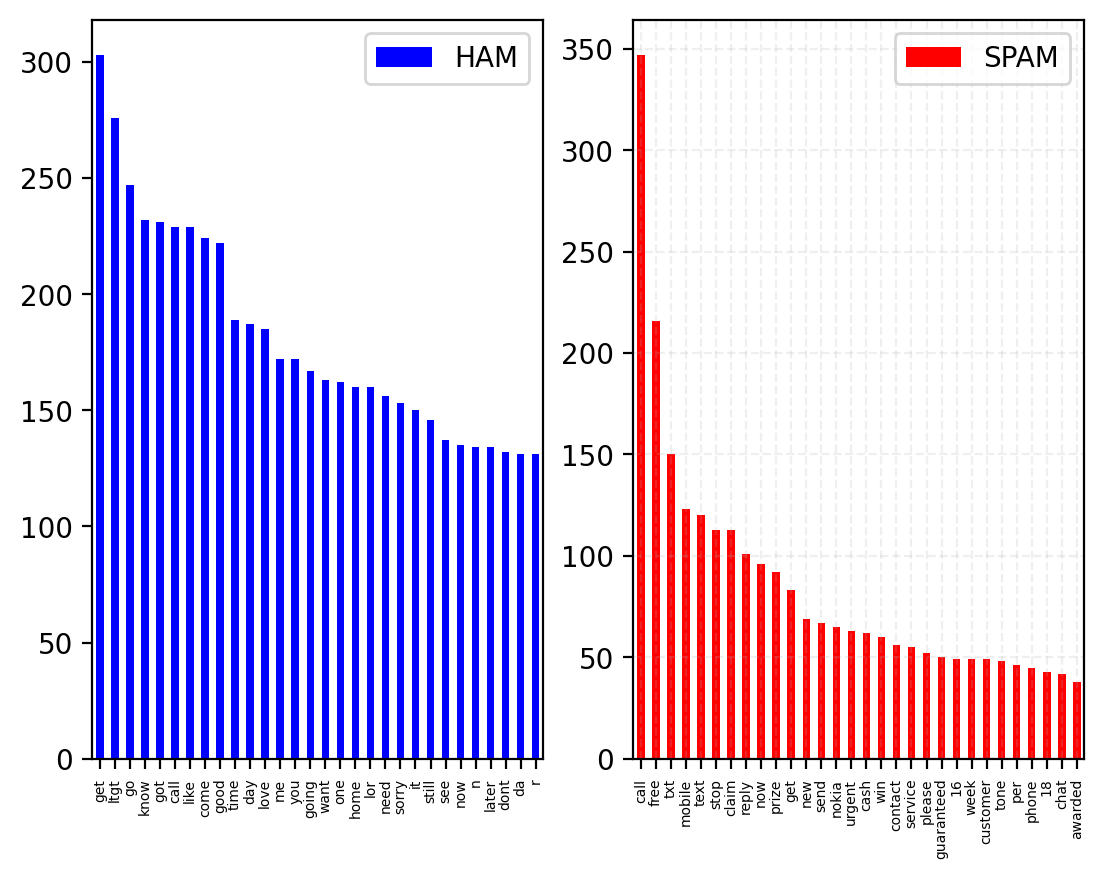

In [39]:
fig, (ax1,ax2) = plt.subplots(1,2, dpi = 200)
ham_string.value_counts()[:30].plot(kind = 'bar', ax = ax1, label = "HAM", color = "blue")
spam_string.value_counts()[:30].plot(kind = 'bar', ax = ax2, label = "SPAM", color = "red")
ax1.legend()
ax2.legend()
plt.grid(ls = "--", alpha = 0.2)
plt.show()

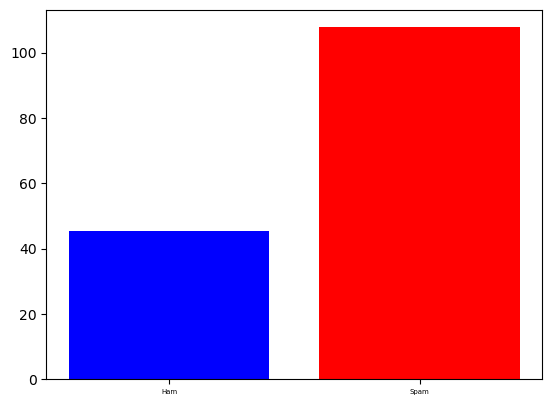

In [40]:
ln1 = np.mean([len(msg) for msg in ham['message'].values])
ln2 = np.mean([len(msg) for msg in spam['message'].values])
plt.bar(["Ham", "Spam"], [ln1,ln2], color = ['blue','red'])
plt.show()

In [41]:
word_cloud = WordCloud(background_color = 'white', width = 1000, height = 600)

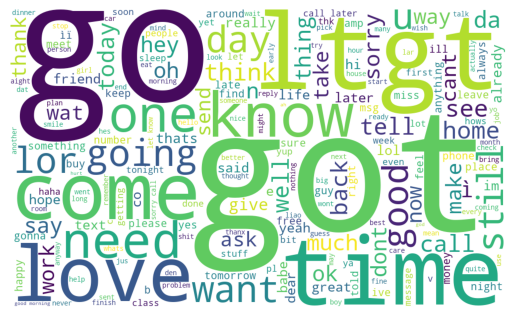

In [42]:
wc = word_cloud.generate_from_text(" ".join(ham_string.values))
plt.imshow(wc)
plt.axis('off')
plt.show()

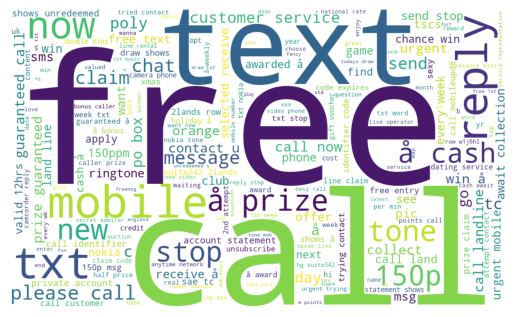

In [43]:
wc = word_cloud.generate_from_text(" ".join(spam_string.values))
plt.imshow(wc)
plt.axis('off')
plt.show()

In [44]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix

In [45]:
X = data['message']

In [46]:
X.head()

0    go jurong point crazy available bugis n great ...
1                                   lar joking wif oni
2    free entry wkly comp win fa cup final tkts 21s...
3                      dun say early hor c already say
4               nah think goes usf lives around though
Name: message, dtype: object

In [47]:
Y = data['label']

In [48]:
Y.head()

0     ham
1     ham
2    spam
3     ham
4     ham
Name: label, dtype: object

In [49]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(X)


In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)


In [51]:
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [60]:
y_train_pred = model.predict(X_train)
train_conf_matrix = confusion_matrix(y_train, y_train_pred)
print('Training Confusion Matrix:')
print(train_conf_matrix)

train_accuracy = accuracy_score(y_train, y_train_pred)
train_accuracy = (round(train_accuracy,2)*100)
print(f'Training Accuracy: {train_accuracy:.2f}%')

Training Confusion Matrix:
[[3365    7]
 [  13  515]]
Training Accuracy: 99.00%


In [61]:
y_test_pred = model.predict(X_test)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)
print('Test Confusion Matrix:')
print(test_conf_matrix)


test_accuracy = accuracy_score(y_test, y_test_pred)
test_accuracy = (round(test_accuracy,2)*100)
print(f'Test Accuracy: {test_accuracy:.2f}%')


Test Confusion Matrix:
[[1435   18]
 [  17  202]]
Test Accuracy: 98.00%


In [78]:
new_message = ["Congratulations! You've won a $1000 Walmart gift card. Click here to claim your prize."]
new_message_transformed = vectorizer.transform(new_message)

prediction = model.predict(new_message_transformed)
if prediction[0] == 'spam':
    print("The message is SPAM.")
else:
    print("The message is NOT SPAM.")


The message is SPAM.
